http://lib.stat.cmu.edu/datasets/boston
Mean Squared Error (MSE): nan


C:\Users\Junaid Ali\AppData\Local\Temp\ipykernel_17956\1650583313.py:23: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum(np.square(predictions - y))


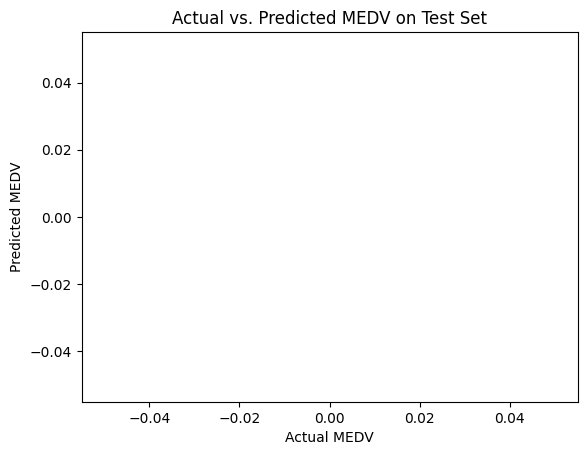

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.seterr(all='warn')
A = np.array([10])
a=A[-1]
a**a
# Load the dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
print(data_url)
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Function to perform gradient descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    costs = []
    for i in range(num_iterations):
        predictions = np.dot(X, theta)
        theta = theta - (alpha/m) * np.dot(X.T, (predictions - y))
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    return theta, costs

# Function to predict MEDV given a set of input features
def predict(X, theta):
    predictions = np.dot(X, theta)
    return predictions

# Add a column of ones for bias term
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Initialize theta with zeros
theta = np.zeros(X_train.shape[1])

# Set hyperparameters for gradient descent
alpha = 0.01
num_iterations = 1000

# Perform gradient descent
theta, costs = gradient_descent(X_train, y_train, theta, alpha, num_iterations)

# Predict MEDV on the test set
predictions = predict(X_test, theta)

# Calculate mean squared error (MSE)
mse = np.mean(np.square(predictions - y_test))
print("Mean Squared Error (MSE):", mse)

# Plot predicted values vs. actual values on the test set
plt.scatter(y_test, predictions)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted MEDV on Test Set")
plt.show()



C:\Users\Junaid Ali\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

Accuracy:  0.5686274509803921


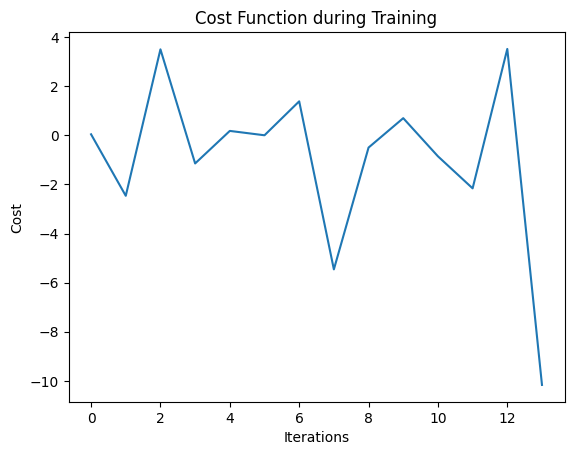

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the Boston Housing Dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Extract the features and target values
X = boston.data
y = boston.target

# Set the threshold value for binarization
threshold = np.median(y) # Set threshold as the median of MEDV values

# Binarize the target values
y = np.where(y >= threshold, 1, 0)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a column of ones to X for the bias term
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

# Function to calculate the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to calculate the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(predictions) + (1-y) * np.log(1-predictions))
    return cost

# Function to perform gradient descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    for i in range(num_iterations):
        predictions = sigmoid(np.dot(X, theta))
        theta = theta - (alpha/m) * np.dot(X.T, (predictions - y))
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

# Function to predict whether suburb has high or low MEDV
def predict(X, theta, threshold):
    probabilities = sigmoid(np.dot(X, theta))
    predictions = np.where(probabilities >= threshold, 1, 0)
    return predictions

# Initialize the parameters for gradient descent
theta = np.zeros(X_train.shape[1])
alpha = 0.01
num_iterations = 1000

# Perform gradient descent
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, num_iterations)

# Evaluate the performance of the model on the test set
predictions = predict(X_test, theta, threshold)
accuracy = np.mean(predictions == y_test)
print("Accuracy: ", accuracy)

# Plot the cost function during training
plt.plot(theta)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function during Training')
plt.show()
